# Draw an image full of circles of which arcs make up the original image 

## Example showing the desired output

![title](desired_image.jpg)

## 4. Subproblem: Create gradient background

## 0. Subproblem: Select the right tools

[Cairo](https://www.cairographics.org/documentation/) seems the right choice regarding drawing while using numpy arrays as base for its drawing.

### Create background image sample

In [6]:
import numpy as np
import cairo
import math

In [313]:

def plot_image(image):
    plt.imshow(image.astype(np.uint8))
#     plt.axis('off')
    
    plt.show()

background = np.zeros((200, 200, 4), dtype=np.uint8)
surface = cairo.ImageSurface.create_for_data(
    background, cairo.FORMAT_ARGB32, 200, 200)

cr = cairo.Context(surface)

cr.set_source_rgba(1.0, 1.0, 1.0, 1)
cr.paint()

# cr.arc(100, 100, 80, 0, 2*math.pi)
# cr.set_line_width(3)
# cr.set_source_rgb(1.0, 0.0, 0.0)
# cr.stroke()

# print(background)
surface.write_to_png("circle.png")

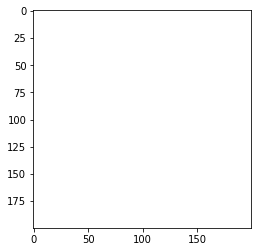

In [314]:
plot_image(background)

## 1. Subproblem: Draw a circle through two points

In [315]:
cr.set_source_rgba(1, 0.2, 0.2, 0.6)

p1_x = 50
p1_y = 50

p2_x = 50
p2_y = 150

cr.arc (p1_x, p1_y, 4.0, 0, 2*np.pi)
cr.arc (p2_x, p2_y, 4.0, 0, 2*np.pi)
cr.fill ();

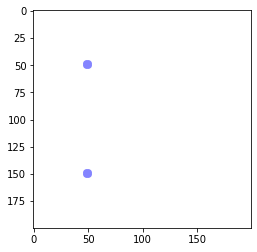

In [316]:
plot_image(background)

In [317]:
def circles_from_p1p2r(p1, p2, r):
    'Following explanation at http://mathforum.org/library/drmath/view/53027.html'
    if r == 0.0:
        raise ValueError('radius of zero')
    (x1, y1), (x2, y2) = p1, p2
    if p1 == p2:
        raise ValueError('coincident points gives infinite number of Circles')
    # delta x, delta y between points
    dx, dy = x2 - x1, y2 - y1
    # dist between points
    q = math.sqrt(dx**2 + dy**2)
    if q > 2.0*r:
        raise ValueError('separation of points > diameter')
    # halfway point
    x3, y3 = (x1+x2)/2, (y1+y2)/2
    # distance along the mirror line
    d = math.sqrt(r**2-(q/2)**2)
    # One answer
    c1 = (x3 - d*dy/q,
          y3 + d*dx/q,
          abs(r))
    # The other answer
    c2 = (x3 + d*dy/q,
          y3 - d*dx/q,
          abs(r))
    return c1, c2

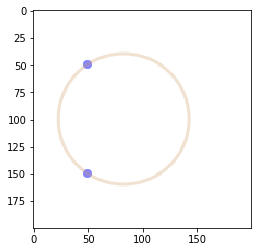

In [318]:
c1, c2 = circles_from_p1p2r((p1_x, p1_y), (p2_x, p2_y), 60.0)

# cr.arc(c1[0], c1[1], c1[2], 0, 2*math.pi)
# cr.set_line_width(3)
# cr.set_source_rgb(1.0, 0.0, 0.0)
# cr.stroke()

cr.arc(c2[0], c2[1], c2[2], 0, 2*math.pi)
cr.set_line_width(3)
cr.set_source_rgba(0.4, 0.6, 0.8, 0.3)
cr.stroke()

plot_image(background)

In [323]:
print(background[:,:,0])
print(np.unique(background))
background[:,:,3] = 28
print(background[:,:,3])

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[128 132 133 134 135 136 137 138 139 140 141 142 143 144 146 148 149 150
 151 152 153 154 156 162 163 165 167 169 170 171 172 177 178 207 209 210
 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228
 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246
 247 248 249 250 251 252 253 254 255]
[[28 28 28 ... 28 28 28]
 [28 28 28 ... 28 28 28]
 [28 28 28 ... 28 28 28]
 ...
 [28 28 28 ... 28 28 28]
 [28 28 28 ... 28 28 28]
 [28 28 28 ... 28 28 28]]


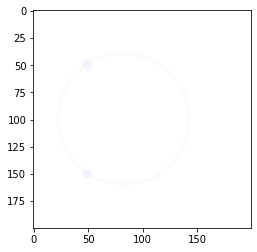

In [324]:
plot_image(background)

In [326]:
surface.write_to_png("circle.png")
surface2 = cairo.ImageSurface.create_for_data(
    background, cairo.FORMAT_ARGB32, 200, 200)

In [327]:
surface2.write_to_png("circle2.png")

## 2. Subproblem: Select which circle to draw (lefside/rightside or up/down) and increase opacity over the arc

In [99]:
def point_closer_to(ref_point, point1, point2):
    (ref_point_x, ref_point_y) = ref_point
    
    point1_x, point1_y = point1[0], point1[1]
    point2_x, point2_y = point2[0], point2[1]
    
    delta_x1, delta_y1 = ref_point_x - point1_x, ref_point_y - point1_y
    delta_x2, delta_y2 = ref_point_x - point2_x, ref_point_y - point2_y
    
    distance1 = math.sqrt(delta_x1**2 + delta_y1**2)
    distance2 = math.sqrt(delta_x2**2 + delta_y2**2)
    
    if distance1 < distance2:
        return point1
    else:
        return point2

# to-do: must select which cirlce more cleverly
def get_circle(point1, point2, radius, image_shape):
    if radius == 0.0:
        raise ValueError('radius of zero')
    
    (point1_x, point1_y), (point2_x, point2_y) = point1, point2
    
    if point1 == point2:
        raise ValueError('coincident points gives infinite number of Circles')
    
    # delta x, delta y between points
    delta_x, delta_y = point2_x - point1_x, point2_y - point1_y
    # dist between points
    distance_points = math.sqrt(delta_x**2 + delta_y**2)
    
    if distance_points > 2.0 * radius:
        raise ValueError('separation of points > diameter')
    
    # halfway point
    point3_x, point3_y = (point1_x + point2_x) / 2, (point1_y + point2_y) / 2
    
    # distance along the mirror line
    distance_mirror = math.sqrt(radius**2 - (distance_points / 2)**2)
    
    # One answer
    left_circle = (point3_x - distance_mirror * delta_y / distance_points,
                   point3_y + distance_mirror * delta_x / distance_points,
                   abs(radius))
    # The other answer
    right_circle = (point3_x + distance_mirror * delta_y / distance_points,
                    point3_y - distance_mirror * delta_x / distance_points,
                    abs(radius))

    image_center = image_shape[0] / 2, image_shape[1] / 2
    
    circle = point_closer_to(image_center, left_circle, right_circle)
    
    return circle

In [100]:
point1 = (80, 30)
point2 = (130, 50)

background = np.zeros((200, 200, 4), dtype=np.uint8)
main_surface = cairo.ImageSurface.create_for_data(
    background, cairo.FORMAT_ARGB32, 200, 200)

cr = cairo.Context(main_surface)

# draw background
cr.set_source_rgba(1.0, 1.0, 1.0, 1)
cr.paint()

# draw the two points
cr.set_source_rgba(1, 0.2, 0.2, 0.6)
cr.arc(point1[0], point1[1], 4.0, 0, 2*np.pi)
cr.arc(point2[0], point2[1], 4.0, 0, 2*np.pi)
cr.fill()

# save the image
main_surface.write_to_png("points.png")

In [101]:
circle = get_circle(point1, point2, 60, background.shape)

# draw the circle
cr.set_source_rgba(1, 0.2, 0.2, 0.1)
cr.arc(circle[0], circle[1], circle[2], 0, 2*math.pi)
cr.set_line_width(3)
cr.stroke()

main_surface.write_to_png("circle_and_points.png")

In [102]:
def quadrant(point, circle):
#     import pdb; pdb.set_trace()
    if point[0] > circle[0] and point[1] < circle[1]:
        return 1
    elif point[0] < circle[0] and point[1] < circle[1]:
        return 2
    elif point[0] < circle[0] and point[1] > circle[1]:
        return 3
    
    return 4    

# to-do: which arc must be decided cleverly
#        for now, it will depend on which side
#        the points are to the center of the image
#        (up/down and right/left)
def get_increase_opacity_angles(point1, point2, circle):
    zero_degrees_point = (circle[0] + circle[2], circle[1])
    
    # delta x, delta y between points
    delta1_x, delta1_y = zero_degrees_point[0] - point1[0], zero_degrees_point[1] - point1[1]
    delta2_x, delta2_y = zero_degrees_point[0] - point2[0], zero_degrees_point[1] - point2[1]
    # dist between points
    distance_points1 = math.sqrt(delta1_x**2 + delta1_y**2)
    distance_points2 = math.sqrt(delta2_x**2 + delta2_y**2)
    
    angle1 = np.arccos(1 - distance_points1**2/(2 * circle[2]**2))
    angle2 = np.arccos(1 - distance_points2**2/(2 * circle[2]**2))
    
    if quadrant(point1, circle) == 1:
        angle1 = np.pi/2 - angle1 + 3/2*np.pi
    elif quadrant(point1, circle) == 2:
        angle1 = 2*np.pi - angle1
    
    if quadrant(point2, circle) == 1:
        angle2 = np.pi/2 - angle2 + 3/2*np.pi
    elif quadrant(point2, circle) == 2:
        angle2 = 2*np.pi - angle2
    
    
    return min(angle1, angle2), max(angle1, angle2)

In [103]:
angle_start, angle_stop = get_increase_opacity_angles(point1, point2, circle)

# draw the circle
cr.set_source_rgba(1, 0.2, 0.2, 1)
cr.arc(circle[0], circle[1], circle[2], angle_start, angle_stop)
cr.set_line_width(3)
cr.stroke()

In [104]:
main_surface.write_to_png("circle_and_points_increased_opacity.png")

In [3]:
def distance_between(point1, point2):
    point1_x, point1_y = point1
    point2_x, point2_y = point2
    
    # delta x, delta y between points
    delta_x, delta_y = point2_x - point1_x, point2_y - point1_y
    # dist between points
    distance_points = math.sqrt(delta_x**2 + delta_y**2)
    
    return distance_points

In [115]:
background = np.zeros((200, 200, 4), dtype=np.uint8)
main_surface = cairo.ImageSurface.create_for_data(
    background, cairo.FORMAT_ARGB32, 200, 200)

cr = cairo.Context(main_surface)

# draw background
cr.set_source_rgba(1.0, 1.0, 1.0, 1)
cr.paint()

# draw the two points
point1 = (160, 130)
point2 = (30, 150)

distance1 = distance_between(point1, point2)

cr.set_source_rgba(1, 0.2, 0.2, 0.6)
cr.arc(point1[0], point1[1], 4.0, 0, 2*np.pi)
cr.arc(point2[0], point2[1], 4.0, 0, 2*np.pi)
cr.fill()

# draw the circle
circle = get_circle(point1, point2, distance1 + 20, background.shape)
cr.set_source_rgba(1, 0.2, 0.2, 0.1)
cr.arc(circle[0], circle[1], circle[2], 0, 2*math.pi)
cr.set_line_width(3)
cr.stroke()

# increase opacity
angle_start, angle_stop = get_increase_opacity_angles(point1, point2, circle)

# draw the circle
cr.set_source_rgba(1, 0.2, 0.2, 1)
cr.arc(circle[0], circle[1], circle[2], angle_start, angle_stop)
cr.set_line_width(3)
cr.stroke()

In [116]:
# draw the two points
point3 = (80, 30)
point4 = (130, 50)

distance2 = distance_between(point3, point4)

cr.set_source_rgba(1, 0.2, 0.2, 0.6)
cr.arc(point3[0], point3[1], 4.0, 0, 2*np.pi)
cr.arc(point4[0], point4[1], 4.0, 0, 2*np.pi)
cr.fill()

# draw the circle
circle = get_circle(point3, point4, distance2 + 20, background.shape)
cr.set_source_rgba(1, 0.2, 0.2, 0.1)
cr.arc(circle[0], circle[1], circle[2], 0, 2*math.pi)
cr.set_line_width(3)
cr.stroke()

# increase opacity
angle_start, angle_stop = get_increase_opacity_angles(point3, point4, circle)

# draw the circle
cr.set_source_rgba(1, 0.2, 0.2, 1)
cr.arc(circle[0], circle[1], circle[2], angle_start, angle_stop)
cr.set_line_width(3)
cr.stroke()

# save the image
main_surface.write_to_png("big_cool.png")

## 3. Subproblem: Select the representative symmetrical(optional) points for an input image

### 3.1 Recreate simple images with hardcoded coordinates

#### Example: Square

The length of the arc replacing a line should be about some constant times the length of the line.

Let that constant be 1.2.

Problems: 

How do we draw convex figures.

How do we know which points to connect and how many connections are there.

Rule: connect a point to the closest point. If that point is already connected to the current point, connect it to the closest point which has the least connections.

In [10]:
def closest_point(point, points):
    best_dist = 4000
    chosen_point = point
    
    for current_point in points:
        if distance_between(point, current_point) < best_dist:
#             import pdb; pdb.set_trace()
            chosen_point = current_point
            best_dist = distance_between(point, current_point)
    
    return chosen_point

def chose_point(point, points, points_connections, connections):
    points.remove(point)
    not_chosen = True
    
    while not_chosen:
        chosen_point = closest_point(point, points)
#         import pdb; pdb.set_trace()
        if [point, chosen_point] not in connections:
            return chosen_point
        
        points.remove(chosen_point)
        
        if len(points) == 0:
            return point
        

In [11]:
points = [(10,10), (210,10), (210,210), (10,210)]

c_al = 1.2

connections = []
points_connections = [0, 0, 0, 0]

for point in points:
    chosen_point = chose_point(point, points, points_connections, connections)
    connections.append([point, chosen_point])


> <ipython-input-10-46432384a402>(8)closest_point()
-> chosen_point = current_point
(Pdb) current_point
(210, 10)
(Pdb) chosen_point
(10, 10)
(Pdb) c
> <ipython-input-10-46432384a402>(8)closest_point()
-> chosen_point = current_point
(Pdb) chosen_point
(210, 210)
(Pdb) c


In [12]:
connections

[[(10, 10), (210, 10)], [(210, 210), (210, 10)]]